# Chapter 1

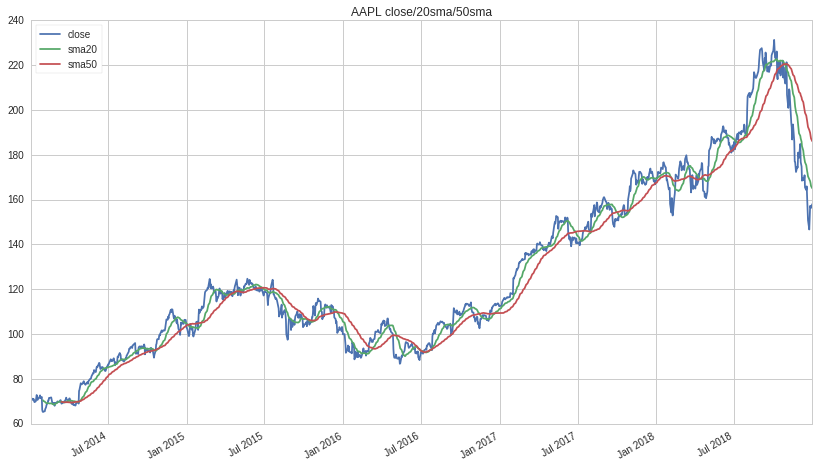

In [1]:
from quantopian.research import prices, symbols

import pandas as pd

close = prices(assets=symbols('AAPL'), start='2014-01-01', end='2019-01-01')

sma20 = close.rolling(20).mean()
sma50 = close.rolling(50).mean()

df = pd.DataFrame({'sma20': sma20, 'sma50': sma50, 'close': close })

df.plot(title='AAPL close/20sma/50sma')

#Chapter 2


In [2]:
from quantopian.research import returns, symbols

ret = returns(assets=symbols('GOOG'), start='2015-01-01', end='2019-01-01')

ret.head(10)

2015-01-02 00:00:00+00:00   -0.003040
2015-01-05 00:00:00+00:00   -0.020846
2015-01-06 00:00:00+00:00   -0.023857
2015-01-07 00:00:00+00:00   -0.001018
2015-01-08 00:00:00+00:00    0.003154
2015-01-09 00:00:00+00:00   -0.012970
2015-01-12 00:00:00+00:00   -0.007298
2015-01-13 00:00:00+00:00    0.007411
2015-01-14 00:00:00+00:00    0.009110
2015-01-15 00:00:00+00:00    0.002157
Freq: C, Name: Equity(46631 [GOOG]), dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb83e436748>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fb83e4cacc0>], dtype=object)

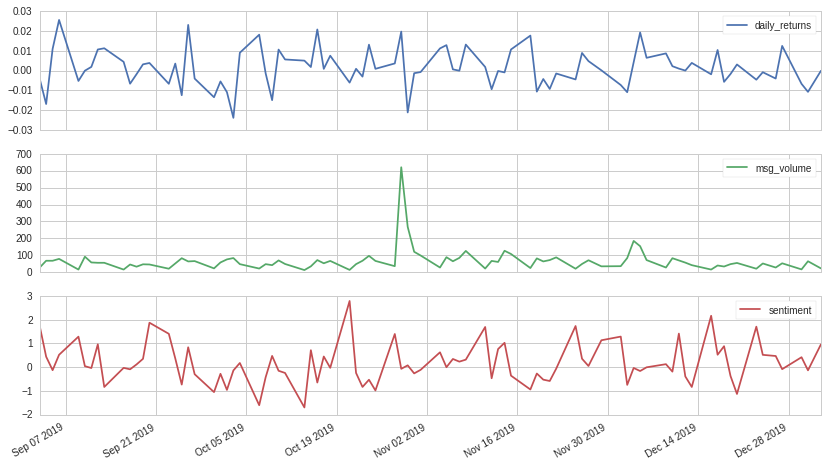

In [3]:
from quantopian.research import run_pipeline
from quantopian.pipeline import Pipeline
from quantopian.pipeline.factors import Returns
from quantopian.pipeline.data.psychsignal import stocktwits
from quantopian.research import symbols



period_start='2019-09-01'
period_end='2020-01-01'

def make_pipeline():
    returns = Returns(window_length=2)
    sentiment = stocktwits.bull_minus_bear.latest
    msg_volume = stocktwits.total_scanned_messages.latest
    
    return Pipeline(columns = {
        'daily_returns': returns, 
        'sentiment': sentiment, 
        'msg_volume': msg_volume
    })

data_output = run_pipeline(
    make_pipeline(), 
    start_date = period_start, 
    end_date = period_end)

stock_data = data_output.xs(symbols('GOOG'), level=1)

stock_data.plot(subplots=True)
    

# Chapter 3

In [4]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.data import USEquityPricing
from quantopian.pipeline.data.psychsignal import stocktwits

from quantopian.pipeline.factors import SimpleMovingAverage

from quantopian.pipeline.experimental import QTradableStocksUS


def make_pipeline():
    base_universe = QTradableStocksUS()
    
    close_price = USEquityPricing.close.latest
    
    sentiment_score = SimpleMovingAverage(
        inputs=[stocktwits.bull_minus_bear], 
        window_length=3,
    )
    
    
    
    return Pipeline(
        columns = {
            'close_price': close_price,
            'sentiment_score': sentiment_score
        },
        screen = base_universe,
    )


pipeline_output = run_pipeline(
    make_pipeline(),
    start_date = '2019-01-01',
    end_date = '2019-12-31'
)

pipeline_output.tail(10)

close_price  sentiment_score
2019-12-31 00:00:00+00:00 Equity(52954 [SWAV])       44.160         0.260000
                          Equity(52968 [FOXA])       37.080        -0.763333
                          Equity(52988 [OSW])        16.900         0.000000
                          Equity(52991 [DOW])        54.326         0.010000
                          Equity(52998 [LEVI])       19.010        -0.250000
                          Equity(53022 [TRWH])       25.710        -0.556667
                          Equity(53023 [LYFT])       43.555         0.366019
                          Equity(53046 [TW])         46.670         1.400000
                          Equity(53050 [SILK])       39.780         1.713333
                          Equity(53064 [PD])         23.430         0.740000

# Chapter 4

[https://www.quantopian.com/tutorials/getting-started#lesson4](https://www.quantopian.com/tutorials/getting-started#lesson4)

In [5]:
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data import USEquityPricing
from quantopian.pipeline.data.psychsignal import stocktwits
from quantopian.pipeline.factors import SimpleMovingAverage

from quantopian.pipeline.experimental import QTradableStocksUS
from quantopian.research import run_pipeline, prices

def make_pipeline():
    base_universe = QTradableStocksUS()
        
    sentiment_score = SimpleMovingAverage(
        inputs=[stocktwits.bull_minus_bear], 
        window_length=3,
    )
    
    top_bottom_scores = (
        sentiment_score.top(50) | sentiment_score.bottom(50)
    )
    
    return Pipeline(
        columns = {
            'sentiment_score': sentiment_score
        },
        screen = (
            base_universe & top_bottom_scores
        )
    )

period_start = '2019-01-01'
period_end = '2019-12-31'

pipe_out = run_pipeline(
        make_pipeline(), 
        start_date = period_start, 
        end_date = period_end
    )

asset_list = pipe_out.index.levels[1].unique()

asset_prices = prices(
    asset_list,
    start = period_start, 
    end = period_end
)

pipe_out['sentiment_score'].head(10)

2019-01-02 00:00:00+00:00  Equity(412 [ANAT])      2.600000
                           Equity(5960 [RNST])    -3.000000
                           Equity(8084 [WABC])     2.890000
                           Equity(8277 [WSBC])    -3.000000
                           Equity(10535 [SUI])     2.670000
                           Equity(15591 [SSRM])    2.676667
                           Equity(18480 [RBA])     2.700000
                           Equity(27046 [DLB])    -3.110000
                           Equity(43599 [RH])      2.566667
                           Equity(45253 [BMCH])   -3.200000
Name: sentiment_score, dtype: float64

In [6]:
pipe_out.index.tolist()


[(Timestamp('2019-01-02 00:00:00+0000', tz='UTC', offset='C'),
  Equity(412 [ANAT])),
 (Timestamp('2019-01-02 00:00:00+0000', tz='UTC', offset='C'),
  Equity(5960 [RNST])),
 (Timestamp('2019-01-02 00:00:00+0000', tz='UTC', offset='C'),
  Equity(8084 [WABC])),
 (Timestamp('2019-01-02 00:00:00+0000', tz='UTC', offset='C'),
  Equity(8277 [WSBC])),
 (Timestamp('2019-01-02 00:00:00+0000', tz='UTC', offset='C'),
  Equity(10535 [SUI])),
 (Timestamp('2019-01-02 00:00:00+0000', tz='UTC', offset='C'),
  Equity(15591 [SSRM])),
 (Timestamp('2019-01-02 00:00:00+0000', tz='UTC', offset='C'),
  Equity(18480 [RBA])),
 (Timestamp('2019-01-02 00:00:00+0000', tz='UTC', offset='C'),
  Equity(27046 [DLB])),
 (Timestamp('2019-01-02 00:00:00+0000', tz='UTC', offset='C'),
  Equity(43599 [RH])),
 (Timestamp('2019-01-02 00:00:00+0000', tz='UTC', offset='C'),
  Equity(45253 [BMCH])),
 (Timestamp('2019-01-02 00:00:00+0000', tz='UTC', offset='C'),
  Equity(45656 [GLPI])),
 (Timestamp('2019-01-02 00:00:00+0000', tz

In [7]:
import alphalens as al




factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor = pipe_out['sentiment_score'],
    prices = asset_prices,
    quantiles=3,
    periods=(1,5,10)
)

factor_data.head(5)

Dropped 12.9% entries from factor data: 5.9% in forward returns computation and 7.1% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        5D       10D  \
date                      asset                                               
2019-01-02 00:00:00+00:00 Equity(412 [ANAT])  -0.017762  0.026205  0.045121   
                          Equity(5960 [RNST])  0.008383  0.059608  0.084098   
                          Equity(8084 [WABC])  0.003517  0.052056  0.080538   
                          Equity(8277 [WSBC]) -0.005332  0.032324  0.053956   
                          Equity(10535 [SUI])  0.012474  0.028430  0.072293   

                                               factor  factor_quantile  
date                      asset                                         
2019-01-02 00:00:00+00:00 Equity(412 [ANAT])     2.60              2.0  
                          Equity(5960 [RNST])   -3.00              1.0  
                          Equity(8084 [WABC])    2.89              3.0  
                          Equity(8277 [WSBC])   -3.00              1.0  
                          Equity(10535 [SUI])    2.67              2.0

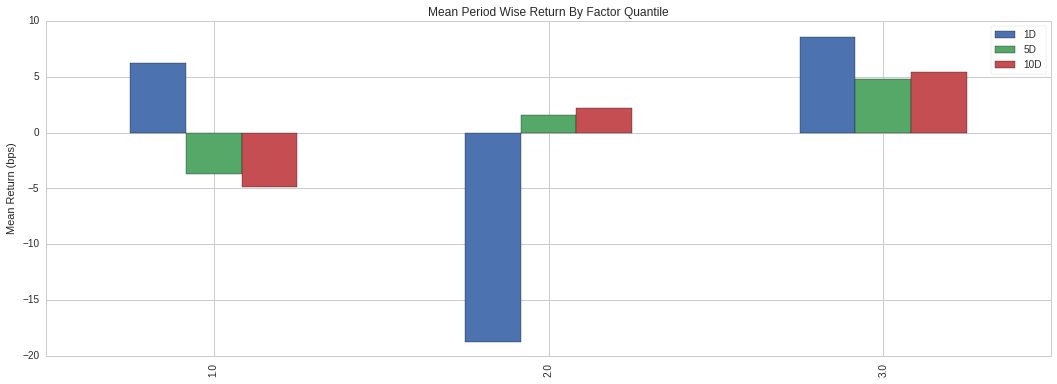

In [8]:
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('1D',)
    )
);

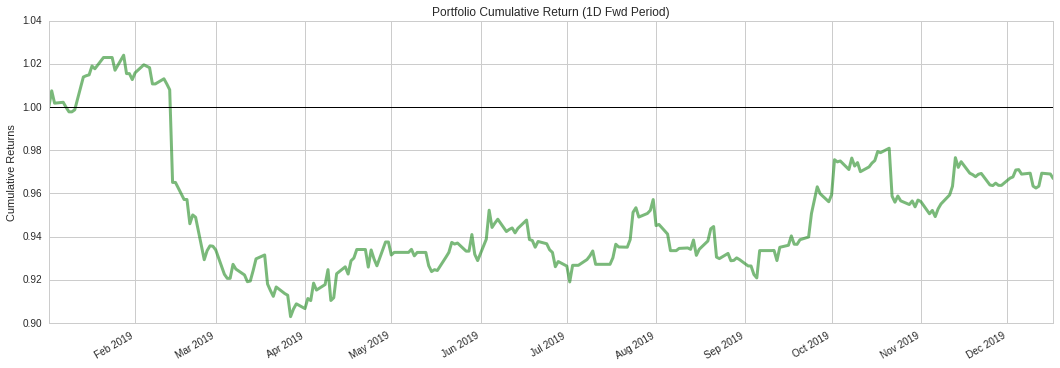

In [9]:
import pandas as pd
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['1D'], '1D', freq=pd.tseries.offsets.BDay());

# Chapter 5